In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [24]:
style.use('fivethirtyeight')

In [2]:
songs = pd.read_csv('./data/five_genres_500_samp.csv')

In [3]:
X = songs._get_numeric_data().drop(columns=['key', 'mode'])
y = songs['genre']

In [4]:
def running_models(X, y, scaled=False, c=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)
    
    # MODELING WITH SCALED FEATURES #
    
    # Scale the features
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    # Creating a df to display results
    model_df = pd.DataFrame(columns=['train_score', 'test_score'])
    
    model_sc = SVC(C=c, kernel='rbf', degree=3)
    model_sc.fit(X_train_sc, y_train)
    train_score = model_sc.score(X_train_sc, y_train)
    test_score = model_sc.score(X_test_sc, y_test)
    
    row = {'model': type(model_sc).__name__,
           'train_score' : train_score,
          'test_score' : test_score,
           'C': c,
          'scaled': True}
    model_df = model_df.append(row, ignore_index=True)
    
    # MODELING WITH UNSCALED FEATURES #
    
    model = SVC(C=20000, kernel='rbf', degree=3)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    row = {'model': type(model).__name__,
       'train_score' : train_score,
      'test_score' : test_score,
       'C': 20000,
      'scaled': False}
    model_df = model_df.append(row, ignore_index=True)
    return model_df

In [5]:
running_models(X, y)

,train_score,test_score,C,model,scaled
0,0.833067,0.7824,10.0,SVC,1.0
1,0.755733,0.7568,20000.0,SVC,0.0


Using Spotify's shared features, **the model has an accuracy of $\approx$ 78.2%**. This is the baseline to beat!

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)

In [7]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [8]:
model = SVC(C=10, kernel='rbf')

In [9]:
model.fit(X_train_sc, y_train)

SVC(C=10)

In [10]:
model.score(X_train_sc, y_train)

0.8330666666666666

In [11]:
model.score(X_test_sc, y_test)

0.7824

In [12]:
y_preds = model.predict(X_test_sc)

In [13]:
results = X_test.copy()

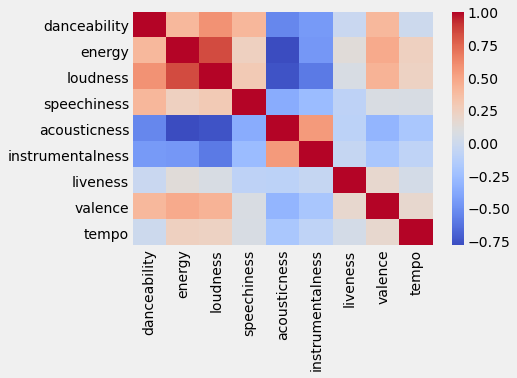

In [25]:
sns.heatmap(results.corr(), cmap='coolwarm');

There's a high **positive correlation between loudness and energy** and a high **negative correlation between energy and acousticness**

In [15]:
results.loc[:, 'genre'] = y_test.copy()

In [16]:
results.loc[:, 'preds'] = y_preds.copy()

In [17]:
results_wrong = results[results['genre'] != results['preds']]

In [18]:
results_wrong['genre'].value_counts(normalize=True)

r&b                      0.316176
rap                      0.286765
rock                     0.220588
progressive bluegrass    0.117647
classical                0.058824
Name: genre, dtype: float64

**Rap and R&B seem to be predicted wrong** most often based on the features Spotify has pulled from the music.

In [19]:
results_wrong[results_wrong['genre'] == 'rap']['preds'].value_counts(normalize=True)

r&b     0.974359
rock    0.025641
Name: preds, dtype: float64

It seems that when Rap is predicted wrong, it's predicted as **R&B about 97.4% of the time.**

In [20]:
results_wrong[results_wrong['genre'] == 'r&b']['preds'].value_counts(normalize=True)

rap                      0.720930
progressive bluegrass    0.162791
rock                     0.116279
Name: preds, dtype: float64

R&B is most likely to be predicted as rap  **72.3% of the time.**

In [21]:
genre_mean = songs.groupby('genre').mean()

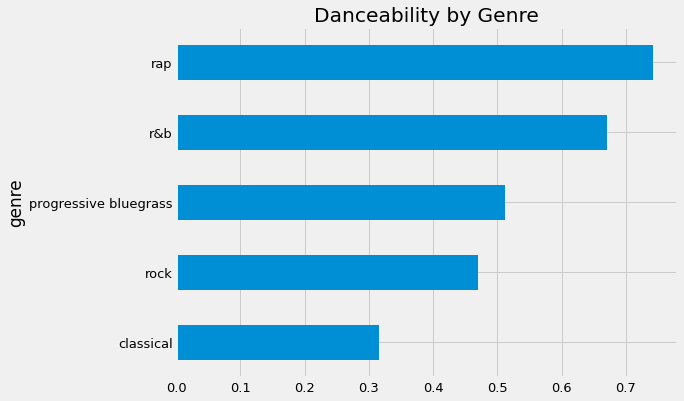

In [29]:
genre_mean['danceability'].sort_values().plot(kind='barh', fontsize=13, figsize=(8, 6))
plt.title('Danceability by Genre');

It looks like Rap has the highest danceability at over 0.7, Classical has the lowest danceability at just above 0.3.

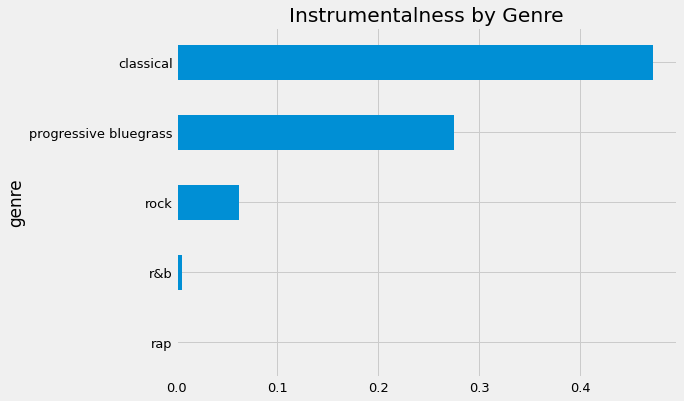

In [31]:
genre_mean['instrumentalness'].sort_values().plot(kind='barh', fontsize=13, figsize=(8, 6))
plt.title('Instrumentalness by Genre');

Classical has the highest instrumentalness, while rap has the lowest

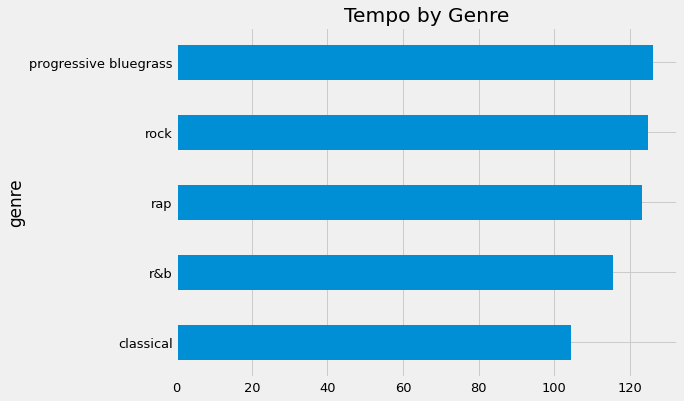

In [30]:
genre_mean['tempo'].sort_values().plot(kind='barh', fontsize=13, figsize=(8, 6))
plt.title('Tempo by Genre');

Interesting that most of the genres hover slightly above 120 as a tempo. There's some interesting reasoning behind this with commercial music and the need for 30-seconds of music to fill an advertising slot. 128 beats per minute would allow for a 16-bar phrase in 4/4 time, which is a common way of writing a full musical phrase.

## What's next?

Now that we've seen how accurate a model is with Spotify's features and 5-genres, let's add some of the new genres to the mix.